In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.model_selection import train_test_split

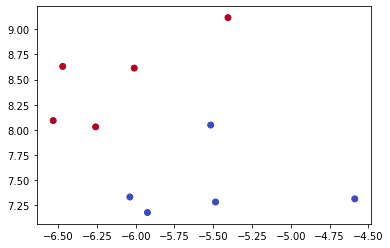

In [50]:
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=10, centers=2, random_state=5, cluster_std=0.40) 
plt.scatter(X[:,0],X[:,1],c=Y,cmap='coolwarm')

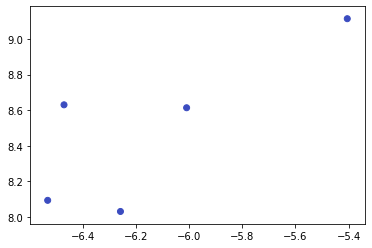

In [51]:
#extracting a single class, positive class in this case
x=[]
y=[]
for i in range(10):
    if Y[i]==1:
        y.append(Y[i])
        x.append(X[i])

x=np.array(x)
y=np.array(y)
size=y.shape[0]
plt.scatter(x[:,0],x[:,1],c=y,cmap='coolwarm')

In [52]:
#to convert crisp data into interval valued data 
def Gen_lb_ub(x):
    lb=x-.02*x
    ub=x+.03*x
    return lb,ub

In [53]:
#acquiring centre and range of IVD to fuzzify data
def Gen_cen_ran(lb,ub):
    cen=(ub+lb)/2
    ran=(ub-lb)/2
    return cen,ran

In [54]:
#the alpha set
alpha=np.linspace(0,1,11)

In [55]:
#function to fuzzify the data points
def Fuzzify(cen,ran,alpha):
    a=cen-ran*(1-alpha)
    b=cen+ran*(1-alpha)
    return a,b

In [56]:
fuzz_points=[]
ffy=[]

In [57]:
fdata=[]
fY=[]

In [58]:

def Gen_setx(a,b,c,y,ffy):
    for i in range(100):
        fuzz_points.append([np.random.uniform(a,b),c])
        fY.append(y)
        ffy.append(y)
    fuzz_points.append([a,c])
    fuzz_points.append([b,c])
    fY.append(y)
    fY.append(y)
    ffy.append(y)
    ffy.append(y)

In [59]:

def Gen_sety(a,b,c,y,ffy):
    for i in range(100):
        fuzz_points.append([c,np.random.uniform(a,b)])
        fY.append(y)
        ffy.append(y)
    fuzz_points.append([c,a])
    fuzz_points.append([c,b])
    fY.append(y)
    fY.append(y)
    ffy.append(y)
    ffy.append(y)

In [60]:
#classifying the model using linear kernel in oc-svm as synthetic data is generated using make_blobs
from sklearn.svm import OneClassSVM as OCSVC
clf2=OCSVC(nu=0.1,kernel='linear')

In [61]:
Wlist=[]
Blist=[]

In [62]:
#main function where model is trained
def main(X,Y,n_samples,n_alpha):
    
    for i in range(n_alpha):
        global fuzz_points
        fuzz_points=[]
        global ffy
        ffy=[]
        t=[]
        for j in range(n_samples):
            lb,ub=Gen_lb_ub(X[j])
            cen,ran=Gen_cen_ran(lb,ub)
            a,b=Fuzzify(cen,ran,alpha[i])
            Gen_setx(a[0],b[0],a[1],Y[j],ffy)
            Gen_setx(a[0],b[0],b[1],Y[j],ffy)
            Gen_sety(a[1],b[1],a[0],Y[j],ffy)
            Gen_sety(a[1],b[1],b[0],Y[j],ffy)
            fdata.extend(fuzz_points)
            x1=np.linspace(-7,-4)
            fuzz_points_new=np.array(fuzz_points)
        X_train,X_test,Y_train,Y_test=train_test_split(fuzz_points,ffy,test_size=0.3,random_state=1)
        clf2.fit(X_train)
        w=clf2.coef_
        b=clf2.intercept_
        Wlist.append([clf2.coef_[0][0],clf2.coef_[0][1]])
        Blist.append(clf2.intercept_[0])
        m=-w[0][0]/w[0][1]
        x2=m*x1-b[0]/w[0][1]
        plt.plot(x1,x2,c=(1-alpha[i],1-alpha[i],1-alpha[i]),linewidth=1.0)
        

In [63]:
#function to plot the data points for each alpha
def plot_data(x,y):
    lb,ub=Gen_lb_ub(x)
    cen,ran=Gen_cen_ran(lb,ub)
    for i in range(11):
        global fuzz_points
        fuzz_points=[]
        a,b=Fuzzify(cen,ran,alpha[i])
        Gen_setx(a[0],b[0],a[1],y,ffy)
        Gen_setx(a[0],b[0],b[1],y,ffy)
        Gen_sety(a[1],b[1],a[0],y,ffy)
        Gen_sety(a[1],b[1],b[0],y,ffy)
        fdata.extend(fuzz_points)
        #print(len(fdata))
        fuzz_points_new=np.array(fuzz_points)
        #print(fuzz_points_new[:,:])
        t=(y,1-alpha[i],1-alpha[i])
        #plt.scatter(i,i,color=(0,alpha[i],alpha[i]))
        plt.scatter(fuzz_points_new[:,0],fuzz_points_new[:,1],color=t,s=2,cmap='coolwarm')
        #print(alpha[i])

2040


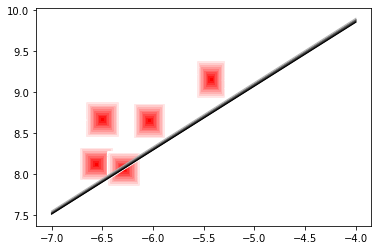

In [74]:
#training the model and plotting the data

global Wlist
Wlist=[]
global Blist
Blist=[]
main(x,y,5,11)
print(len(fuzz_points))
for i in range(5):
    plot_data(x[i],y[i])

In [41]:
Wlist

[[-891.7385569227675, 1132.7122498699755],
 [-895.4357931737883, 1136.1457768343466],
 [-893.9130337699568, 1137.9114700802315],
 [-894.1170573128383, 1140.2191124494427],
 [-894.318948370284, 1141.6619103250223],
 [-895.3489432236462, 1143.4354414992995],
 [-895.2647163472132, 1146.5607282337528],
 [-895.7142928152391, 1147.7865762776382],
 [-896.9101108437602, 1149.1301351901222],
 [-897.5450142609276, 1150.5994335270811],
 [-898.0905268280325, 1152.3423473776566]]

In [42]:
 Blist

[-14735.659880065521,
 -14809.491510009364,
 -14830.443551635342,
 -14855.033784484462,
 -14842.171867370213,
 -14866.963040160734,
 -14907.942100524493,
 -14920.322087096782,
 -14927.19022979695,
 -14933.679536437596,
 -14947.194955443934]

In [78]:
W0_dict={}
W1_dict={}
B_dict={}
for i in range (11):
    W0_dict[Wlist[i][0]]=[]
    W1_dict[Wlist[i][1]]=[]
    B_dict[Blist[i]]=[]
for i in range (11):
    W0_dict[Wlist[i][0]].append(alpha[i])
    W1_dict[Wlist[i][1]].append(alpha[i])
    B_dict[Blist[i]].append(alpha[i])  

In [79]:
def f_alpha(d):
    f=[]
    alp=[]
    for key in d.keys():
        alp.append(max(d[key]))
        f.append(key*max(d[key])*max(d[key]))
    return f,alp

In [63]:
f_W0,W0_alp=f_alpha(W0_dict)
f_W1,W1_alp=f_alpha(W1_dict)
f_B,B_alp=f_alpha(B_dict)

In [64]:
W0_final=np.trapz(f_W0,W0_alp)
W1_final=np.trapz(f_W1,W1_alp)
B_final=np.trapz(f_B,B_alp)

In [65]:
print(W0_final)
print(W1_final)
print(B_final)

-300.3638253711715
384.6353148119197
-4996.951416654834


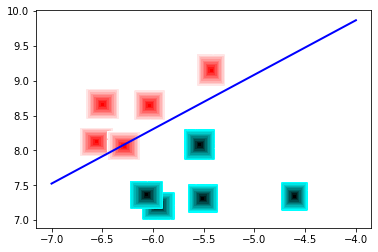

In [71]:
#training the model and plotting the data
global Wlist
Wlist=[]
global Blist
Blist=[]
main(x,y,len(x),11)
for i in range(len(X)):
    plot_data(X[i],Y[i])
x1=np.linspace(-7,-4)
m=-W0_final/W1_final
x2=m*x1-B_final/W1_final
plt.plot(x1,x2,c=(0,0,1),linewidth=2.0)